In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/users/PHS0336/medirz90/github/LSSutils')
from lssutils.dataviz import setup_color

In [2]:
setup_color()

['base_losses', 'losses']

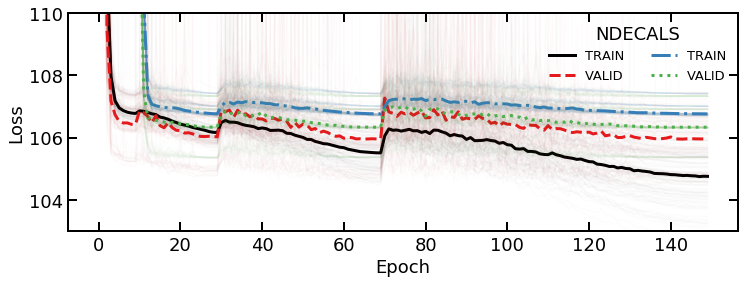

In [23]:
def add_plot(ax, d, c):
    for sample in ['train', 'valid']:
        loss_reg = np.array(d['losses'].item()[sample]).reshape(5*20, 150)

        #
        for loss in loss_reg:
            ax.plot(loss, color=c[sample], alpha=0.01, ls='-')

        ax.plot(np.median(loss_reg, axis=0), color=c[sample],
                 label=sample.upper(), lw=3)
    

    
    
c1 = {'train':'C0', 'valid':'C1'}
c2 = {'train':'C2', 'valid':'C4'}



r = 'ndecals'
p = '/fs/ess/PHS0336/data/rongpu/imaging_sys/regression/v2/'
d = np.load(f'{p}sv3nn_lrg_{r}_256/metrics.npz', allow_pickle=True)
d_ = np.load(f'{p}sv3nn_lrg_{r}_256_lin/metrics.npz', allow_pickle=True)


fg, ax = plt.subplots(figsize=(12, 4))

add_plot(ax, d, c1)
add_plot(ax, d_, c2)

ax.set(ylim=(103, 110), xlabel='Epoch', ylabel='Loss')
ax.legend(title=r.upper(), ncol=2)
